QUESTION 2

UNEMPLOYMENT ANALYSIS WITH INDIA

Unemployment is a critical indicator of a nation’s economic health and social stability. Fluctuations in unemployment rates reflect the dynamics of labor markets, productivity, and broader economic conditions. This project explores unemployment trends over time, with a focus on identifying key patterns, seasonal variations, and the impact of external shocks such as the COVID-19 pandemic.

By leveraging data cleaning, exploration, and visualization techniques in Python, the analysis provides insights into long-term trends, short-term fluctuations, and structural challenges within the labor market. Special attention is given to regional disparities, demographic effects, and cyclical employment patterns that shape the overall unemployment landscape.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file='content/MyDrive/drive/Unemployment in India.csv'


Mounted at /content/drive


Lets import the libraries to be used

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
stylerr='ggplot'
from matplotlib import style
import matplotlib.pyplot as plt

#Importing SKlearn functions and classes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,confusion_matrix,roc_auc_score,roc_curve,auc,f1_score

View  the dataset

In [ ]:
#load the dataset
df=pd.read_csv('/content/drive/MyDrive/Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
#Data Info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
#shape
df.shape

(768, 7)

DATA CLEANING

In [ ]:

#datacleaning
#handling missing value
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
df.dropna(inplace=True)#drop missing
df.isnull().sum()
display (df)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [ ]:
#using simpleimputer to handlemissing value
#seperate data into numerical and categorical data
SimpleImputer(missing_values=np.nan,strategy='mean')
num_var=df.select_dtypes(include=['int64','float64']).columns
cat_var=df.select_dtypes(include=['object']).columns

In [ ]:
#numerical  variable
df[num_var].isnull
display (df)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [ ]:
#categorical variable
df[cat_var].isnull().sum()

,0
Region,0
Date,0
Frequency,0
Area,0


from the above ,we can conclude no missing values

Exploration and Visualization

In [ ]:
#print summary statistics
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


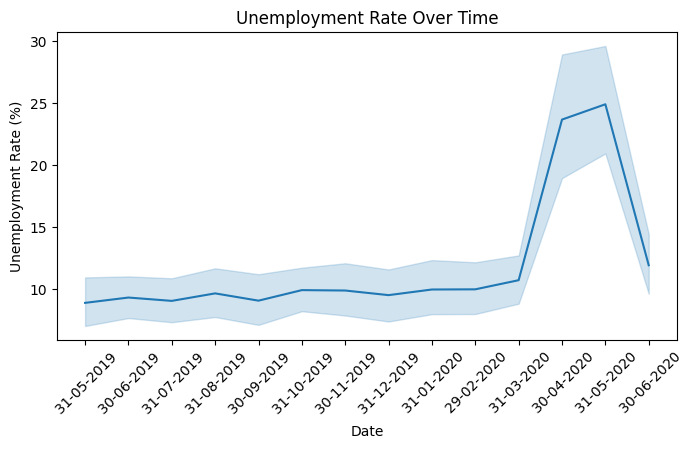

In [ ]:
#plot line chart unemployment rate
plt.figure(figsize=(8,4))
sns.lineplot(x=' Date',y=' Estimated Unemployment Rate (%)',data=df)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()




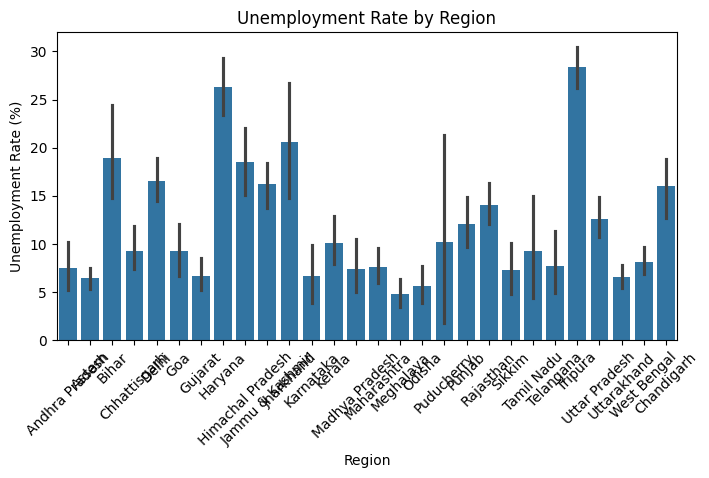

In [ ]:
#unemployment across regions
plt.figure(figsize=(8,4))
sns.barplot(x='Region',y=' Estimated Unemployment Rate (%)',data=df)
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.ylabel('Unemployment Rate (%)')
plt.show()




Text(0, 0.5, 'Frequency')

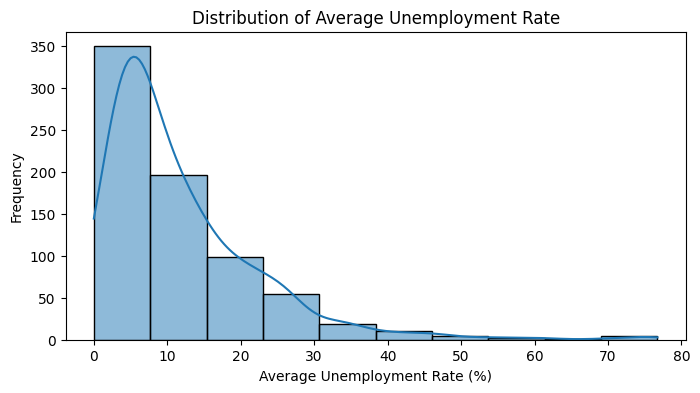

In [ ]:
#plot a histogram for average  unemployment rate
plt.figure(figsize=(8,4))
sns.histplot(df[' Estimated Unemployment Rate (%)'],bins=10,kde=True)
plt.title('Distribution of Average Unemployment Rate')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Frequency')



Investigating the impact of covi_19 on employment rate

Average unemployment rate before and after covid_19

In [ ]:
#average unemplyment rate before vs after covid
before_covid=df[df[' Date']<'2015-01-01'][' Estimated Unemployment Rate (%)'].mean()
after_covid=df[df[' Date']>='2015-01-01'][' Estimated Unemployment Rate (%)'].mean()
print('Average unemployment rate before covid:',before_covid)
print('Average unemployment rate after covid:',after_covid)


Average unemployment rate before covid: 11.787945945945946
Average unemployment rate after covid: nan


Text(0.5, 1.0, 'Average Unemployment Rate Before and After Covid')

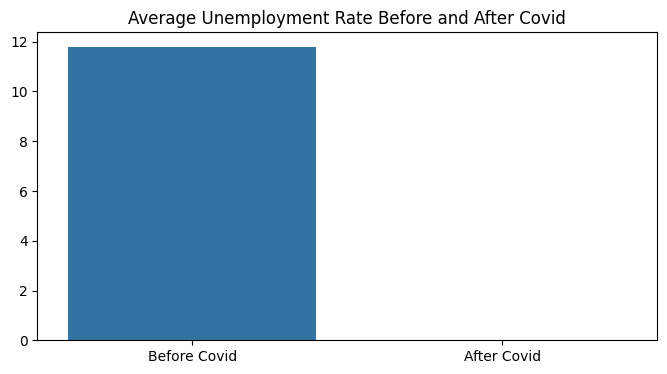

In [ ]:
#plot the graph for average unemploymentrate before vs after covid
plt.figure(figsize=(8,4))
sns.barplot(x=['Before Covid','After Covid'],y=[before_covid,after_covid])
plt.title('Average Unemployment Rate Before and After Covid')





Identify key patterns or seasonal trends

In [ ]:
from datetime import date
#covert date colume to date time
date=pd.to_datetime(df[' Date'])
df[' Date']=date
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    740 non-null    object        
 1    Date                                     740 non-null    datetime64[ns]
 2    Frequency                                740 non-null    object        
 3    Estimated Unemployment Rate (%)          740 non-null    float64       
 4    Estimated Employed                       740 non-null    float64       
 5    Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                      740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 62.4+ KB


In [ ]:
#identify seasonal trends
#Monthly trend
monthly_trend=df.resample('M',on=' Date')[' Estimated Unemployment Rate (%)'].mean()
display(monthly_trend)

/tmp/ipython-input-1951570882.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend=df.resample('M',on=' Date')[' Estimated Unemployment Rate (%)'].mean()


,Estimated Unemployment Rate (%)
Date,
2019-05-31,8.874259
2019-06-30,9.303333
2019-07-31,9.033889
2019-08-31,9.637925
2019-09-30,9.051731
2019-10-31,9.900909
2019-11-30,9.868364
2019-12-31,9.497358
2020-01-31,9.950755


In [ ]:
#trends for year
yearly_trend=df.resample('Y',on=' Date')[' Estimated Unemployment Rate (%)'].mean()
display(yearly_trend)


/tmp/ipython-input-746012364.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_trend=df.resample('Y',on=' Date')[' Estimated Unemployment Rate (%)'].mean()


,Estimated Unemployment Rate (%)
Date,
2019-12-31,9.399047
2020-12-31,15.101581


In [25]:
#trends for quater
quuaterly_trend=df.resample('Q',on=' Date')[' Estimated Unemployment Rate (%)'].mean()
display(quuaterly_trend)




/tmp/ipython-input-2676658076.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quuaterly_trend=df.resample('Q',on=' Date')[' Estimated Unemployment Rate (%)'].mean()


,Estimated Unemployment Rate (%)
Date,
2019-06-30,9.088796
2019-09-30,9.241069
2019-12-31,9.758712
2020-03-31,10.202215
2020-06-30,20.194342


A graph depicting TRENDS

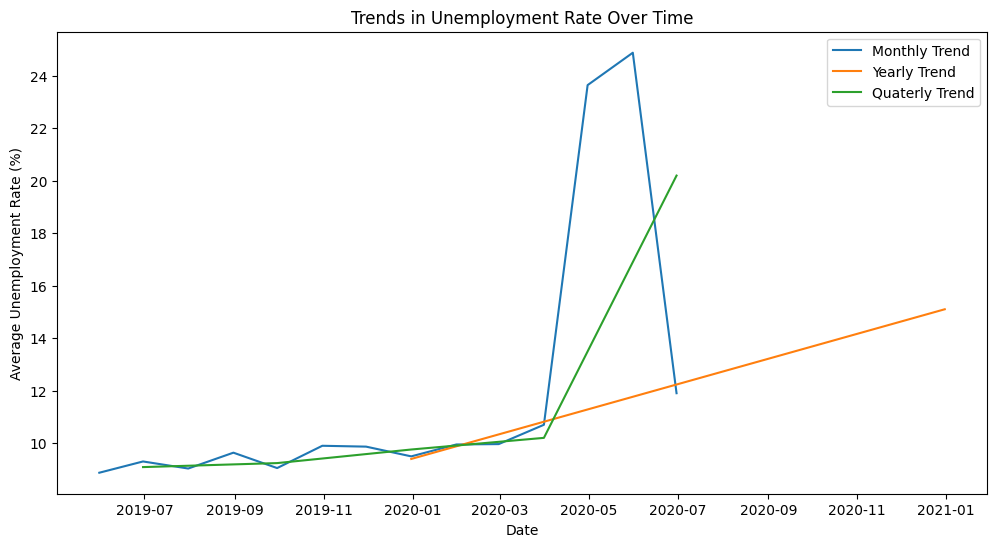

In [26]:
#plotting a graph to compare the  trends based on month,year and quater
plt.figure(figsize=(12,6))
plt.plot(monthly_trend.index,monthly_trend.values,label='Monthly Trend')
plt.plot(yearly_trend.index,yearly_trend.values,label='Yearly Trend')
plt.plot(quuaterly_trend.index,quuaterly_trend.values,label='Quaterly Trend')
plt.xlabel('Date')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Trends in Unemployment Rate Over Time')
plt.legend()
plt.show()


Insights and policy implications from Unemployment trends

Government may need to invest in Job opportunities ,availability of more job roless, and also creating more entrepreneurship for more people in order to have a decline in unemployment rate

In terms of seasonal rate government also should increase the rate of employment even on holidays,some people may be free to work at that point in time ,so giving the unemployed that opportunity to work at that point in time also reduces the chances of being unemployed

**Impact of Economic Crises(covid)**

Before the Covid the unemployment rate was lesser ,but the pandemic increased the chances of unemployment due to health challengs some people encountered, cases like this government can provide Remote Jobs ,a work from home can be convinient for safty,Food provisions to avoid cases of going out and being exposed to the hazards

**Youth and graduate Unemployment**

There should be more availability of Graduate trainee jobs that are Age Exclusive so as the give the youths the opporunity to work as fresh graduates other than being  denied the Job role bases on age,,Internship,vocational studies should also be included.

**Gender**

Being a woman or a man shouldn't deprive an individual of a job role what matters is the availability and readiness to work